## Course 3: Regression Logistique et softmax
### Author: Ricardo Vallejo


- L’objectif de ces exercices est de pratiquer la régression logistique sur un
ensemble de données.

- Soit l’ensemble des données Iris qui comprend 150 observations de fleurs
d’iris décrites par la longueur et la largeur des sépales et des pétales. Trois espèces différentes sont incluses Iris setosa, Iris versicolor et Iris virginica

In [1]:
# https://www.kaggle.com/jamesdhope/logistic-regression-for-iris-classification
# https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc  
# https://zhuanlan.zhihu.com/p/64505136 - Reference enseignante

# <font color="blue" >Exercice 2 : Regression  logistique - BiClass </font>

# 1.  Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

# 1. Téléchargez le contenu de la base de données iris

data = pd.read_csv("iris.csv")
pd.set_option('display.max_rows', None)
display(data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### 1.1.  Identify Classes et Features

In [2]:
fn = ['sepal_length','sepal_width', 'petal_length','petal_width'] #Features ou characteristics

In [3]:
cn = ['setosa', 'versicolor', 'virginica'] #Classes

### 1.2. Check the distribution or instances of any class


In [4]:
data.groupby('species').size()  #Class species ALL DATA

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## 2. Split data in Training Data and Test Data

We can split the dataset into a training set and a test set. Usually, we should also have a validation set

In [5]:
#Repartition des donnes - I have to do that after preprocessing and imputation null values

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.5, stratify = data['species'], random_state = 10) #40% data for tests


In [6]:
train.groupby('species').size() #SPLITED DATA TRAINING

species
setosa        25
versicolor    25
virginica     25
dtype: int64

In [7]:
test.groupby('species').size() #SPLITED DATA TESTS

species
setosa        25
versicolor    25
virginica     25
dtype: int64

## 2. Creation de matrices des characteristiques - Virginica est la class BINARY

Affecter l’étiquette Y (variable cible) « 1 » aux observations dont la
classe est Iris virginica et l’étiquette « 0 » aux autres classes (Not Iris
virginica).

In [16]:
# In order to do references to feature data Test and Training easily we create Matrix of charactersitics
import warnings
warnings.filterwarnings(action='ignore')

X_train = train[['petal_length','petal_width']] # train [['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['petal_length','petal_width']] #test[['sepal_length','sepal_width', 'petal_length','petal_width']]
Y_test = test[['species']]

# create a new column based on condition
specieTarget = 'virginica'
Y_test['species'] = np.where(Y_test['species'] == specieTarget, 1, 0)
Y_train['species'] = np.where(Y_train['species'] == specieTarget, 1, 0)
#Y = pd.DataFrame(data, columns = ['species'])

X =  data[['petal_length','petal_width']]
Y =  np.where(data['species'] == specieTarget, 1, 0)



## 3. Représentez la dispersion de la variable Petal width en fonction de Petal length

In [62]:

V = data.loc[data['species'] == specieTarget]
NV = data.loc[data['species'] != specieTarget]
print(V.shape)  #Virginica
print(NV.shape) #No Virginica


(50, 5)
(100, 5)


Text(6.5, 2.3, 'Iris virginica')

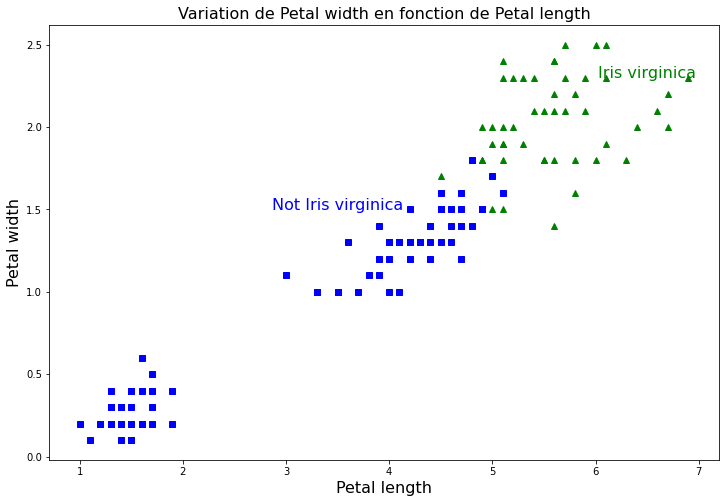

In [18]:
plt.figure(figsize=(12, 8))

plt.plot(V[['petal_length']], V[['petal_width']], "g^")
plt.plot(NV[['petal_length']], NV[['petal_width']], "bs")

plt.xlabel("Petal length", fontsize=16)
plt.ylabel("Petal width", fontsize=16)
plt.title("Variation de Petal width en fonction de Petal length", fontsize=16)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=16, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=16, color="g", ha="center")

## 4. Représentez la dispersion de la variable Petal width en fonction de la variable cible


In [19]:
V = data.loc[data['species'] == specieTarget]
NV = data.loc[data['species'] != specieTarget]

NV['species'] =  np.where(NV['species'] == specieTarget, 1, 0)
V['species'] =  np.where(V['species'] == specieTarget, 1, 0)

<Figure size 432x288 with 0 Axes>

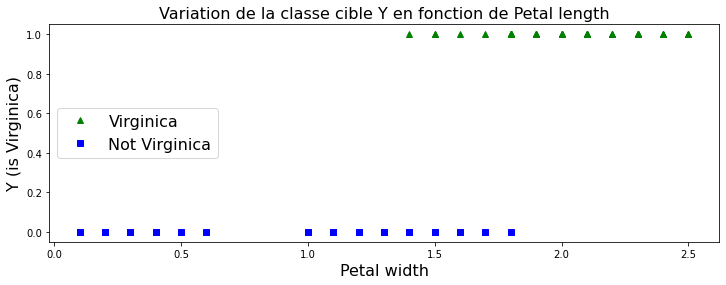

In [20]:


fig = plt.figure()
plt.figure(figsize=(12, 4))
#ax1 = fig.add_subplot(111)
plt.plot(V[['petal_width']], V[['species']], "g^", label='Virginica')
plt.plot(NV[['petal_width']], NV[['species']], "bs", label='Not Virginica')
plt.ylabel("Y (is Virginica)", fontsize=16)
plt.xlabel("Petal width", fontsize=16)
plt.legend(loc="center left", fontsize=16)
plt.title("Variation de la classe cible Y en fonction de Petal length", fontsize=16)

plt.show()

## 5. En considérant la variable Petal width, entrainez un modèle de régression logistique sur l’ensemble des données


In [21]:
from sklearn.linear_model import LogisticRegression


In [37]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.01, verbose=0, warm_start=False)

In [38]:
model.fit(X_train[['petal_width']], np.array(Y_train).ravel())

LogisticRegression(max_iter=300, random_state=0, tol=0.01)

## Parametres de modele

On a une seule varaible caractéristique, on a donc deux paramètres θ0 et θ1

In [39]:
model.coef_

array([[3.31058924]])

In [40]:
model.intercept_

array([-5.53834601])

## 5.1. Prediction

In [41]:
Y_pred=model.predict(X_test[['petal_width']])

## 5.2. Evaluation de model

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[50  0]
 [ 2 23]]


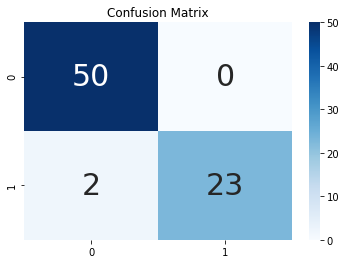

In [43]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [44]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_pred) )

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.92      0.96        25

    accuracy                           0.97        75
   macro avg       0.98      0.96      0.97        75
weighted avg       0.97      0.97      0.97        75



In [45]:
model.score(X_test[['petal_width']], Y_test)

0.9733333333333334

## 5.7. Frontieres de desicion

### Methode 1

In [91]:
c = np.ones([len(V[['species']])])
d = np.zeros([len(NV[['species']])])


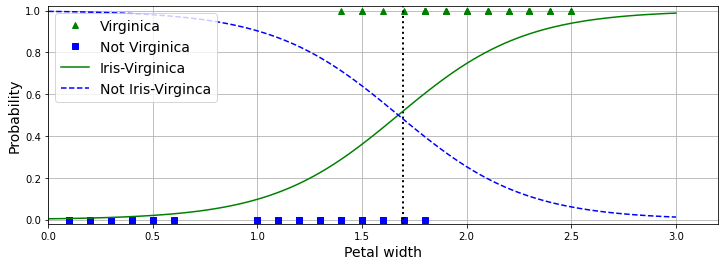

In [92]:
X_new = np.linspace(0,3,100).reshape(-1,1)
y_proba = model.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(12, 4))

#Data
plt.plot(V[['petal_width']], c, "g^", label='Virginica')
plt.plot(NV[['petal_width']], d, "bs", label='Not Virginica')

#Limits
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

# Probability
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")

plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 3.2, -0.02, 1.02])
plt.grid()
plt.show()

## Methode 2

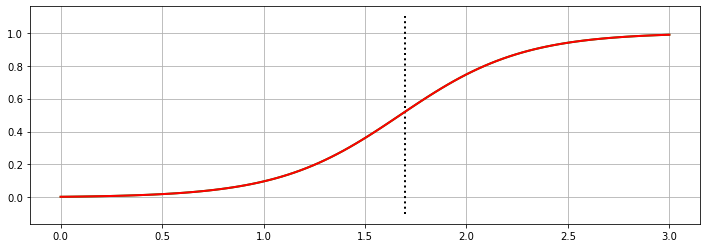

In [140]:
X_new = np.linspace(0,3,100).reshape(-1,1)

y1= model.intercept_ + model.coef_ * X_new

z1 = 1/(1 + np.exp(-y1))  #Function sigmoide logistique 

plt.figure(figsize=(12, 4))
plt.grid()
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, z1, "r-", linewidth=2, label="Iris virginica")

# <font color="blue" >Exercice 2 : Regression  softmax - Multiclass</font>


Pour illustrer la régression logistique softmax, nous allons considérer les
trois d’espèces en se basant sur Petal length et Petal width

In [161]:
# La regression logistique peut être transformée
# en regression softmax en donnant à l’hyperparamètre
# multi_class la valeur "multinomial"
from sklearn.linear_model import LogisticRegression
X = np.array(X_train) #iris["data"][:, (2, 3)]
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

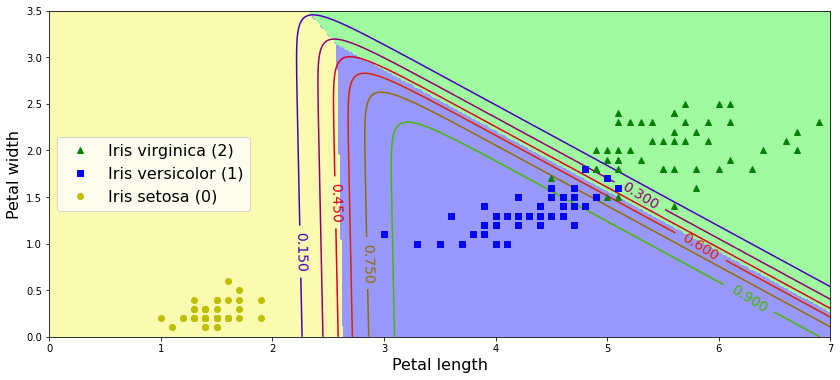

In [162]:
# les frontières de décision entre les classes prises
# deux à deux sont linéaires.
# La figure présente les probabilités pour la classe
# Iris versicolor (1), représentées par des courbes de probabilités
x0, x1 = np.meshgrid(
 np.linspace(0, 8, 500).reshape(-1, 1),
 np.linspace(0, 3.5, 200).reshape(-1, 1),
 )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)

y_predict = softmax_reg.predict(X_new)


zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(14, 6))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica (2)")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor (1)")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa (0)")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=14)
plt.xlabel("Petal length", fontsize=16)
plt.ylabel("Petal width", fontsize=16)
plt.legend(loc="center left", fontsize=16)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [169]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [170]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [172]:
np.array(X_train)

array([[1.4, 0.1],
       [4.1, 1.3],
       [1.5, 0.2],
       [5.6, 2.4],
       [4.7, 1.5],
       [5.8, 2.2],
       [5.1, 1.9],
       [5.2, 2.3],
       [4.3, 1.3],
       [1.5, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.3],
       [4.8, 1.4],
       [6.3, 1.8],
       [5. , 2. ],
       [1.5, 0.1],
       [4.6, 1.3],
       [5.3, 1.9],
       [4.9, 1.8],
       [1.5, 0.4],
       [3.5, 1. ],
       [5.6, 2.4],
       [4.8, 1.8],
       [1.5, 0.4],
       [3.9, 1.1],
       [4.5, 1.5],
       [4.9, 2. ],
       [4.1, 1.3],
       [5.1, 1.8],
       [1.2, 0.2],
       [4.9, 1.5],
       [1.7, 0.3],
       [3.9, 1.4],
       [5.1, 2.4],
       [3.8, 1.1],
       [5.4, 2.1],
       [4. , 1.3],
       [1.4, 0.2],
       [3.6, 1.3],
       [1.7, 0.2],
       [1.3, 0.2],
       [6.1, 2.3],
       [4.8, 1.8],
       [4.2, 1.3],
       [1.7, 0.5],
       [1.9, 0.4],
       [4.9, 1.8],
       [5.8, 1.6],
       [1.5, 0.2],
       [3.5, 1. ],
       [1.5, 0.2],
       [5.6,

In [179]:
np.array(Y_train['species']).astype(None)

array([0., 1., 0., 2., 1., 2., 2., 2., 1., 0., 0., 0., 0., 1., 2., 2., 0.,
       1., 2., 2., 0., 1., 2., 2., 0., 1., 1., 2., 1., 2., 0., 1., 0., 1.,
       2., 1., 2., 1., 0., 1., 0., 0., 2., 1., 1., 0., 0., 2., 2., 0., 1.,
       0., 2., 2., 0., 2., 2., 0., 1., 0., 0., 0., 2., 1., 1., 2., 0., 1.,
       1., 0., 2., 1., 1., 1., 2.])

### Using dataframes

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data['species'] = np.where((data.species == 'setosa'),0,data.species)
data['species'] = np.where((data.species == 'versicolor'),1,data.species)
data['species'] = np.where((data.species == 'virginica'),2,data.species)

train, test = train_test_split(data, test_size = 0.5, stratify = data['species'], random_state = 10) #40% data for tests


X_train = train [['petal_length','petal_width']]
Y_train = train[['species']]

X_test = test[['petal_length','petal_width']]
Y_test = test[['species']]

pp = LogisticRegression()
pp.fit(np.array(X_train), np.array(Y_train['species']).astype(None))


LogisticRegression()

In [183]:
#Prédiction de la classe d'apatenance d'observations


pp.predict([[5, 2],[4, 1], [1, 2], [7, 3], [7, 0.5]])

array([2, 1, 0, 2, 2])

In [184]:
# Calcul de probabilité d'appartenance de l'observation [5,2]

# On peut calcluer la probabilité d'appartenance de
# l'échantillon [5,2]. On remarque que la valeur la plus élevé
# est pour la classe 2.
pp.predict_proba([[5, 2]]).argmax()

2

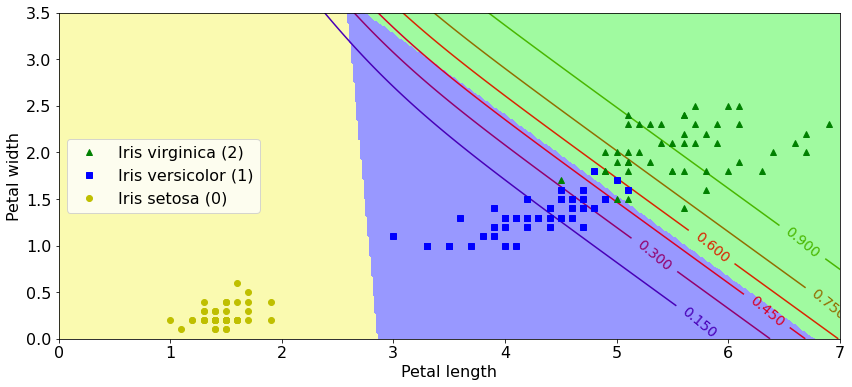

In [198]:
# les frontières de décision entre les classes prises
# deux à deux sont linéaires.
# La figure présente les probabilités pour la classe
# Iris versicolor (1), représentées par des courbes de probabilités
x0, x1 = np.meshgrid(
 np.linspace(0, 8, 500).reshape(-1, 1),
 np.linspace(0, 3.5, 200).reshape(-1, 1),
 )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = pp.predict_proba(X_new)

y_predict = pp.predict(X_new)


zz1 = y_proba[:,2].reshape(x0.shape) #Probalilite de apparttaniencie a Virginica
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(14, 6))

#Data
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica (2)")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor (1)")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa (0)")

#Regions
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)  #Probalilite de apparttaniencie a Virginica
plt.clabel(contour, inline=1, fontsize=14)



plt.xlabel("Petal length", fontsize=16)
plt.ylabel("Petal width", fontsize=16)
plt.legend(loc="center left", fontsize=16)
plt.axis([0, 7, 0, 3.5])
plt.show()

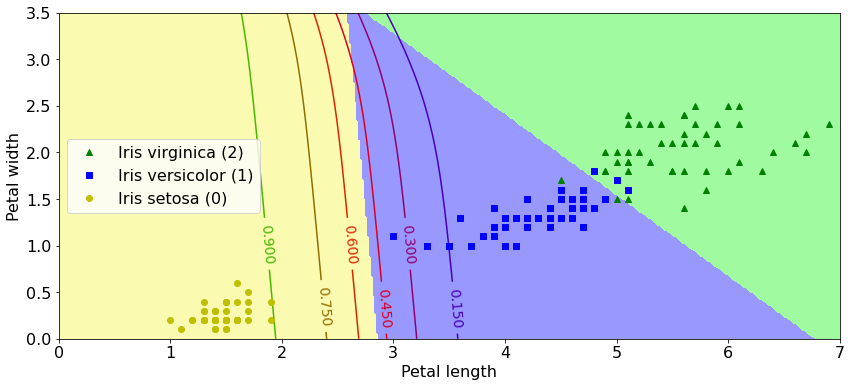

In [203]:
# les frontières de décision entre les classes prises
# deux à deux sont linéaires.
# La figure présente les probabilités pour la classe
# Iris versicolor (1), représentées par des courbes de probabilités
x0, x1 = np.meshgrid(
 np.linspace(0, 8, 500).reshape(-1, 1),
 np.linspace(0, 3.5, 200).reshape(-1, 1),
 )

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = pp.predict_proba(X_new)

y_predict = pp.predict(X_new)


zz1 = y_proba[:,0].reshape(x0.shape) #Probalilite de apparttaniencie a Virginica
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(14, 6))

#Data
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica (2)")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor (1)")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa (0)")

#Regions
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)  #Probalilite de apparttaniencie a Virginica
plt.clabel(contour, inline=1, fontsize=14)



plt.xlabel("Petal length", fontsize=16)
plt.ylabel("Petal width", fontsize=16)
plt.legend(loc="center left", fontsize=16)
plt.axis([0, 7, 0, 3.5])
plt.show()

## Notes:  Function Sigmoide

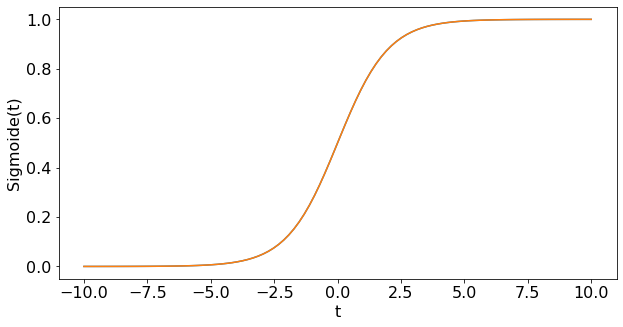

In [194]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
v = np.exp(x)/(1 + np.exp(x))
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(10, 5))
plt.plot(x, z)
plt.plot(x, v)
plt.xlabel("t")
plt.ylabel("Sigmoide(t)")

plt.show()


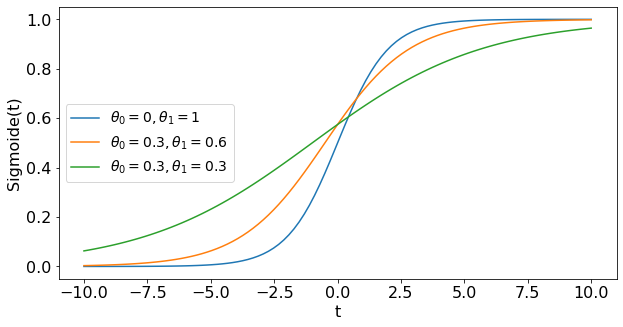

In [195]:
t = np.linspace(-10, 10, 100)
x1 = 1*t
x2 = 0.3+0.6*t
x3= 0.3+0.3*t
z1 = 1/(1 + np.exp(-x1))
z2 = 1/(1 + np.exp(-x2))
z3 = 1/(1 + np.exp(-x3))
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(10, 5))
plt.plot(x, z1, label = r'$\theta_0=0, \theta_1=1$')
plt.plot(x, z2, label = r'$\theta_0=0.3, \theta_1=0.6$')
plt.plot(x, z3, label = r'$\theta_0=0.3, \theta_1=0.3$')
plt.xlabel("t")
plt.ylabel("Sigmoide(t)")
plt.legend(loc="center left", fontsize=14)
plt.show()

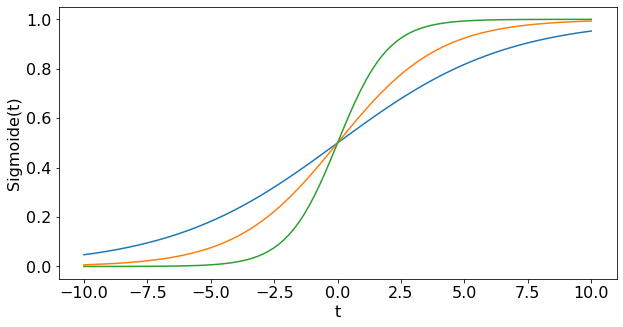

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
z1 = 1/(1 + np.exp(-0.3*x))
z2 = 1/(1 + np.exp(-0.5*x))
z3 = 1/(1 + np.exp(-x))
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(10, 5))
plt.plot(x, z1)
plt.plot(x, z2)
plt.plot(x, z3)
plt.xlabel("t")
plt.ylabel("Sigmoide(t)")

plt.show()

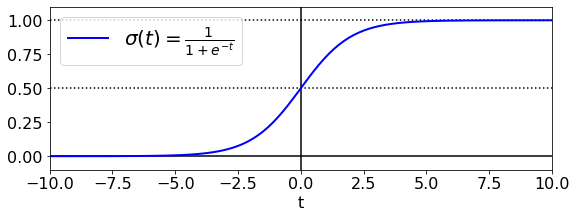

In [197]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
#save_fig("logistic_function_plot")
plt.show()